# Load Data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 랜덤성 부여하지 않고 잘라낸 경우

In [3]:
test_size = 50

X_test = X[: test_size]
y_test = y[: test_size]

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
X_train = X[test_size :]
y_train = y[test_size :]

print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

## 훈련 및 테스트 세트에 대한 성능 확인, 정확도

In [6]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train)
test_pred = dt_clf.predict(X_test)

print('훈련 데이터 예측 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred)))
print('테스트 데이터 예측 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

훈련 데이터 예측 정확도 : 1.000
테스트 데이터 예측 정확도 : 0.000


## train_test_split 활용

In [7]:
# model_selection : 훈련에 사용할 데이터를 처리할 수 있는 여러 모듈이 들어있는 패키지

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=121
)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


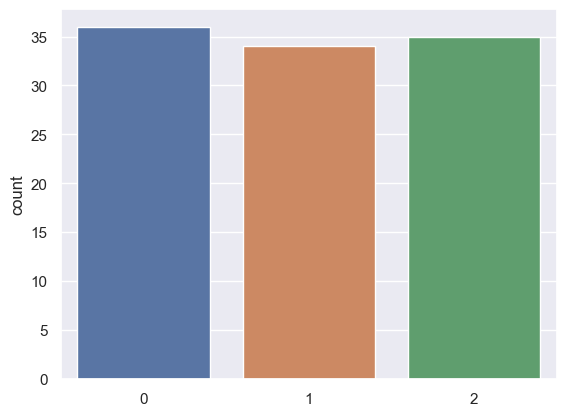

In [9]:
# y_train의 종류별 개수를 시각화

sns.countplot(x=y_train)
plt.show()

## stratify 옵션 사용

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=121,
  stratify=y # 잘라낼 데이터의 원본 데이터 개수 비율을 보고 분할 수행. 단,범주데이터만
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


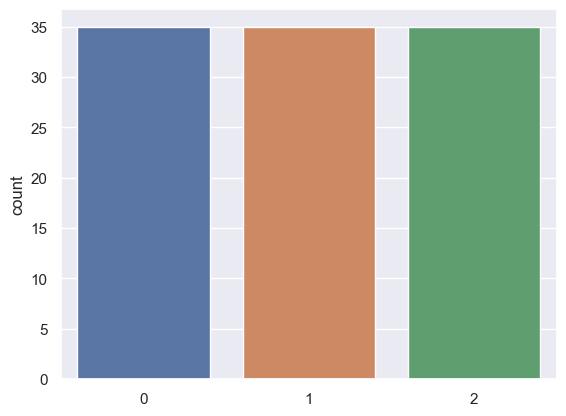

In [11]:
sns.countplot(x=y_train)
plt.show()

## K-Fold와 Stratified K-Fold 알아보기

### K-Fold

In [12]:
from sklearn.model_selection import KFold
import numpy as np

# 3개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=3)

# KFold 객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 array로 반환
for train_indices, test_indices in kfold.split(X):
  print('검증 세트의 인덱스 : {}'.format(test_indices))
  print()

검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

검증 세트의 인덱스 : [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]



교차검증

In [13]:
n_iter = 0
cv_accuracy = []  # 각 폴드에서의 정확도 담을 배열

# KFold 객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(X):

  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  # 반복 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))

  cv_accuracy.append(accuracy)

# 개별 iteration 별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#2 교차 검증 정확도 : 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

#3 교차 검증 정확도 : 0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.0


### Stratified K Fold

In [14]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

for train_indices, test_indices in skf.split(X, y):
  print('검증 세트의 인덱스 : {}'.format(test_indices))
  print()

  class_, counts = np.unique(y[test_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print('클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개'.format(classes[0], classes[1], classes[2]))
  print('='*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



Stratified K-Fold 교차검증

In [15]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy=[]

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋 추가 입력 필요
for train_index, test_index in skfold.split(X, y):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]

  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))

  cv_accuracy.append(accuracy)

# 교차 검증별 정활도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


### cross_val_score

In [16]:
# 1. 전체 데이터를 훈련 / 테스트 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

In [17]:
# 2. 훈련 세트를 훈련 / 검증 세트로 분할. cross_val_score 사용시 불필요

# X_train, X_valid, y_train, y_valid = train_test_split(
#   X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
# )

from sklearn.model_selection import cross_val_score
import numpy as np

# scores : 각 폴드의 훈련에 대한 검증 결과가 리스트 형태로 반환
scores = cross_val_score(
  DecisionTreeClassifier(), # Estimator 객체, Classifier가 들어가면 자동으로 Stratified K-Fold 방식 사용
  X_train,
  y_train,
  scoring='accuracy',  # 평가방식, 기본적으로 정확도(accuracy) 사용. 다양한 평가방식 제공
  cv=3  # cross validation 회수 = Fold 개수
)

print('교차 검증별 정확도 : ', np.round(scores, 4))
print('## 평균 검증 정확도 : ', np.mean(scores))

교차 검증별 정확도 :  [0.9714 0.9429 0.9429]
## 평균 검증 정확도 :  0.9523809523809522


## GridSearch 를 이용한 하이퍼 파라미터 튜닝과 교차검증

In [18]:
from sklearn.model_selection import GridSearchCV

# parameter map 정의
# 머신러닝 알고리즘에 들어가는 하이퍼 파라미터 목록을 정의한 dict

parameters = {
  'max_depth' : [1, 2, 3],
  'min_samples_split' : [2, 3]
}

grid_dt_clf = GridSearchCV(
  DecisionTreeClassifier(),
  param_grid=parameters,
  cv=3,
  refit=True,
  return_train_score=True,
  n_jobs=-1  # 사용가능한 cpu 모두 사용해서 훈련에 투입
)

In [19]:
# 훈련
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [20]:
# GridSearchCV 결과 확인

grid_dt_clf.cv_results_

{'mean_fit_time': array([0.00047398, 0.00047056, 0.00109641, 0.00058222, 0.00023874,
        0.00021998]),
 'std_fit_time': array([1.83039643e-05, 2.85826214e-05, 4.82215170e-04, 3.11035838e-04,
        9.44557589e-06, 1.29616312e-06]),
 'mean_score_time': array([0.00025209, 0.00026751, 0.00068498, 0.00034046, 0.00016753,
        0.00015966]),
 'std_score_time': array([3.60179558e-06, 2.24982599e-05, 3.41294399e-04, 1.88488849e-04,
        6.03889155e-06, 4.49566384e-07]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [21]:
import pandas as pd

scores_df = pd.DataFrame(grid_dt_clf.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000474,0.000018,0.000252,3.601796e-06,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.657143,0.657143,0.657143,0.657143,0.000000,5,0.671429,0.671429,0.671429,0.671429,0.000000
1,0.000471,0.000029,0.000268,2.249826e-05,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.657143,0.657143,0.657143,0.657143,0.000000,5,0.671429,0.671429,0.671429,0.671429,0.000000
2,0.001096,0.000482,0.000685,3.412944e-04,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.971429,0.942857,0.942857,0.952381,0.013469,1,0.971429,0.985714,0.971429,0.976190,0.006734
3,0.000582,0.000311,0.000340,1.884888e-04,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.971429,0.942857,0.942857,0.952381,0.013469,1,0.971429,0.985714,0.971429,0.976190,0.006734
4,0.000239,0.000009,0.000168,6.038892e-06,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.971429,0.942857,0.942857,0.952381,0.013469,1,0.985714,0.985714,0.985714,0.985714,0.000000
5,0.000220,0.000001,0.000160,4.495664e-07,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.971429,0.942857,0.942857,0.952381,0.013469,1,0.985714,0.985714,0.985714,0.985714,0.000000


In [22]:
# 성능이 제일 좋았던 결과 확인

print('GridSearchCV 최적 하이퍼 파라미터 : {}'.format(grid_dt_clf.best_params_))
print('GridSearchCV 최적 정확도 : {:.4f}'.format(grid_dt_clf.best_score_))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 2, 'min_samples_split': 2}
GridSearchCV 최적 정확도 : 0.9524


In [23]:
# 최고의 결과를 냈었던 Estimator로 예측

pred = grid_dt_clf.predict(X_test)
pred

array([2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       1])

In [26]:
# 일반화 점수 확인

print('테스트 세트의 정확도 : {:.4f}'.format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.8889


In [27]:
# GridSearch에서 가장 성능이 좋았던 모델 

best_estimator = grid_dt_clf.best_estimator_

pred = best_estimator.predict(X_test)
print('테스트 세트의 정확도 : {:.4f}'.format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.8889
